In [ ]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle
from exported import tags_len, parse_tags

In [ ]:
upstream = ['parsing-jsons-into-a-data-frame']
product = None

In [ ]:
df = pickle.loads(Path(upstream['parsing-jsons-into-a-data-frame']['df']).read_bytes())

## Tags

- `tags` contain classifiers for each song
- It's a list of (key, value) tuples. Example: (rock, 100)
- The median is a single tag
- There is an outlier with 100 tags

In [11]:
df.tags.sample(n=10)

3301                                                    []
48491                                                   []
16248                                                   []
41913                                                   []
53593                                                   []
60411                                                   []
26653                                                   []
14673    [[electro, 100], [Electroclash, 42], [electron...
20348                                                   []
35835                                                   []
Name: tags, dtype: object

In [12]:
def tags_len(tags):
    return len(tags)         

df['tags_len'] = df.tags.apply(tags_len)

There's a long tail of tags:

In [13]:
df['tags_len'].describe()

count    66046.000000
mean         8.954395
std         19.311366
min          0.000000
25%          0.000000
50%          1.000000
75%          8.000000
max        100.000000
Name: tags_len, dtype: float64

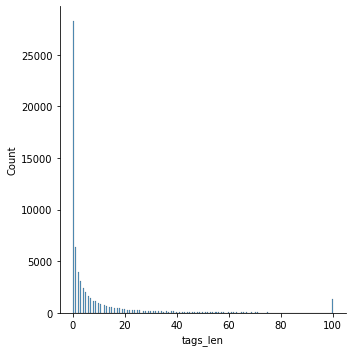

In [14]:
sns.displot(df['tags_len'])

In [15]:
def parse_tags(tags):
    if not tags:
        return {}
    
    # we'll only process the first three     
    to_process = tags[:3]
    
    # convert: [[key0, value0], [key1, value1], ...]
    # into: [key0, key1, ...], [value0, value1, ...], 
    keys, values = zip(*to_process[:3])
    
    # convert to: column_name: key
    keys_mapping = {f'tag_{i}': k for i, k in enumerate(keys)}
    # convert to: column_name: value
    values_mapping = {f'value_{i}': k for i, k in enumerate(values)}
    
    return {**keys_mapping, **values_mapping}

In [16]:
df_tags = pd.DataFrame.from_records(df.tags.apply(parse_tags))
df_tags.head()

,tag_0,value_0,tag_1,tag_2,value_1,value_2
0,NaN,NaN,NaN,NaN,NaN,NaN
1,house set,100,NaN,NaN,NaN,NaN
2,Love,100,noise,going crazy,100,100
3,freejazz,100,NaN,NaN,NaN,NaN
4,singer-songwriter,100,60s,NaN,100,NaN


In [17]:
df_tagged = df.join(df_tags)

In [ ]:
Path(product['df']).parent.mkdir(exist_ok=True, parents=True)
Path(product['df']).write_bytes(pickle.dumps(df))

Path(product['df_tagged']).parent.mkdir(exist_ok=True, parents=True)
Path(product['df_tagged']).write_bytes(pickle.dumps(df_tagged))